Creating a Contingency table using Crosstab()

In [6]:
import pandas as pd

bank_train = pd.read_csv('bank_marketing_train.csv')

"""Contingency Table"""

crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
print (crosstab_01)

response             no   yes
previous_outcome             
failure            2928   477
nonexistent       25923  2527
success             388   708


Creating the bar graph of the Contingency Table

<Axes: xlabel='previous_outcome'>

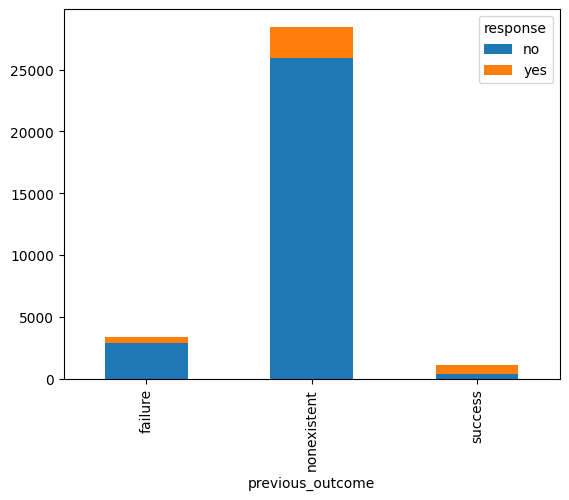

In [7]:
crosstab_01.plot(kind='bar', stacked=True)

Normialized table
 - div() divides values of the table by another object within a specified axis 

<Axes: xlabel='previous_outcome'>

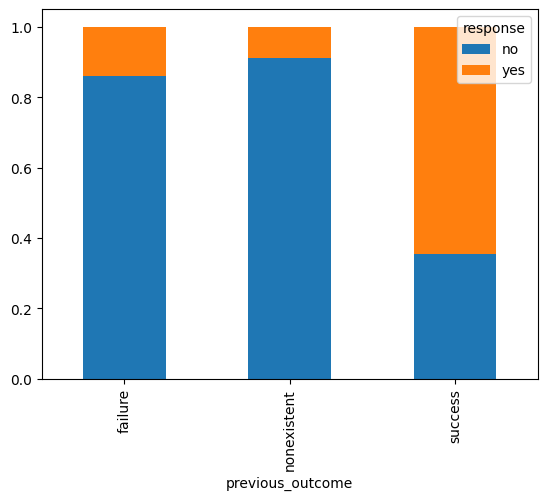

In [8]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

Second CrossTab

sum of the cross tab was multiplied to 100 to convert it from proportion to percentage
round will round the nubers in the table to specify the number of significant digits

<Axes: xlabel='response'>

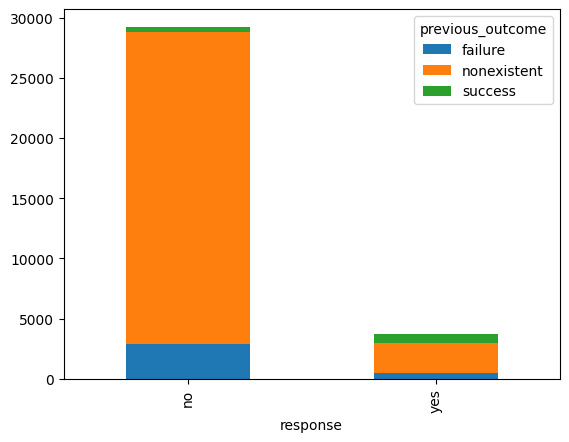

In [9]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])

"""Round of the Crosstab"""
round(crosstab_02.div(crosstab_02.sum(0), axis=1)*100,1)

crosstab_02.plot(kind='bar', stacked=True)


Constructing histogram with overlay

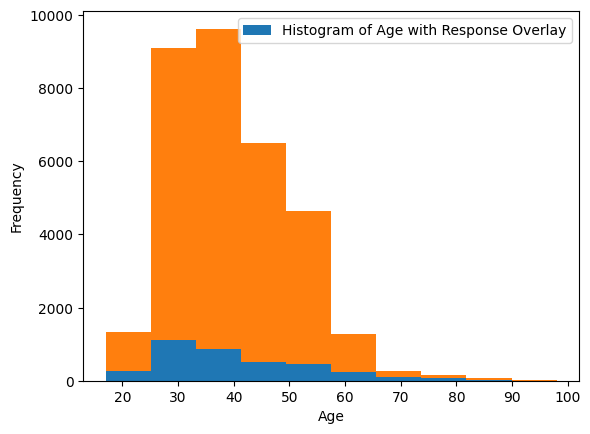

In [10]:
import numpy as np
import matplotlib.pyplot as plt

bt_age_y = bank_train[bank_train.response == "yes"]['age']
bt_age_n = bank_train[bank_train.response == "no"]['age']

"""Stacked histogram of the two variables"""

plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
plt.legend(['Histogram of Age with Response Overlay'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Nomralized Histogram Graph

[[ 0.   9.5]
 [ 9.5 19. ]
 [19.  28.5]
 [28.5 38. ]
 [38.  47.5]
 [47.5 57. ]
 [57.  66.5]
 [66.5 76. ]
 [76.  85.5]
 [85.5 95. ]]


C:\Users\Mark\AppData\Local\Temp\ipykernel_26280\1487410532.py:8: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table/n_table.sum(axis=1)[:, None]


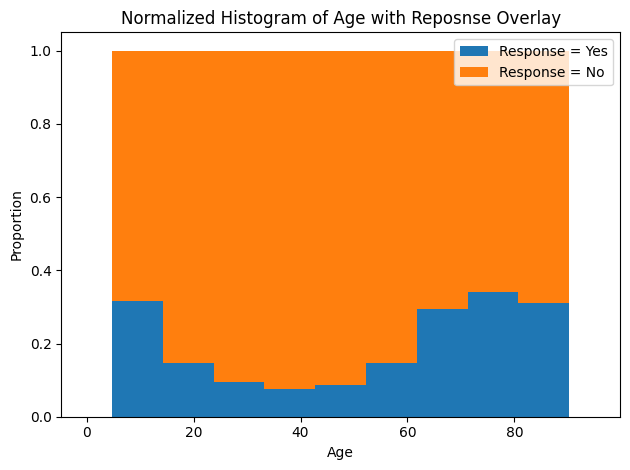

In [11]:
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins = 10, stacked=True, density=True, range=(0,95))


"""Append information n into a matrix"""
n_table = np.column_stack((n[0], n[1]))

"""divide each row by the sum across that row"""
n_norm = n_table/n_table.sum(axis=1)[:, None]

"""create array whose rows are the cuts of each bin"""
ourbins = np.column_stack((bins[0:10], bins[1:11]))
print (ourbins)

"""Create the normalized histogram"""

p1 = plt.bar(x=ourbins[:,0], height=n_norm[:,0], width=ourbins[:,1] - ourbins[:,0])
p2 = plt.bar(x=ourbins[:,0], height=n_norm[:,1], width=ourbins[:,1] - ourbins[:,0], bottom=n_norm[:,0])
"""General Setup of Plot, Legend Title Labels"""

plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Reposnse Overlay')
plt.xlabel('Age');plt.ylabel('Proportion');plt.tight_layout();plt.show()


Binning based on predictive Value

<Axes: xlabel='age_binned'>

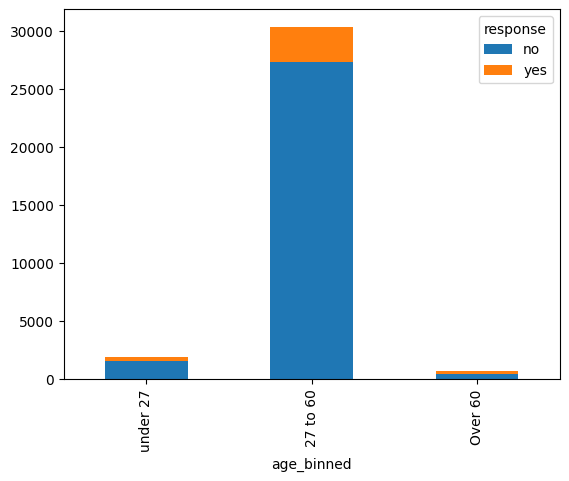

In [12]:
bank_train['age_binned'] = pd.cut(x=bank_train['age'], bins = [0,27,60.01,100], 
                                  labels=["under 27", "27 to 60", "Over 60"], right = False)

crosstab_03 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_03.plot(kind='bar', stacked=True)


Nomralized Graph for Binned

<Axes: xlabel='age_binned'>

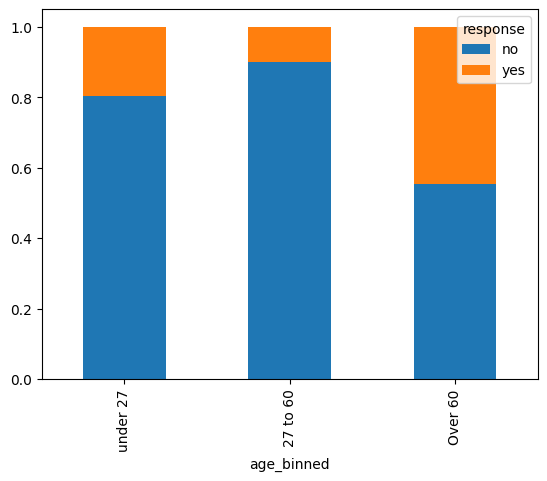

In [13]:
crosstab_03_norm = crosstab_03.div(crosstab_03.sum(1), axis=0)
crosstab_03_norm.plot(kind='bar', stacked=True)